In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import pandas as pd

# Load the dataset
data_path = '/content/drive/MyDrive/GoogleColab/web social media anlysis and visualization/api_news_articles.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataset and the column names
print(data.head())
print(data.columns)


                                               title  \
0  Google Pixel 8A: News, Specs, Features, Price,...   
1  The Rabbit R1 Flops, Nokia Gets Back to Basics...   
2  Elon Musk outlines vision for AI-driven news s...   
3  Jeff Bridges Is Returning to the Grid for Tron...   
4  A national shortage of construction workers is...   

                                             content  
0  Googles Pixel A-series Android smartphones hav...  
1  If you thought the less-than-stellar launch of...  
2  Elon Musk, CEO of X (formerly Twitter), shared...  
3  Jared Leto may be the main star of the upcomin...  
4  When the pandemic hit the US in the spring of ...  
Index(['title', 'content'], dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import nltk
nltk.download('stopwords')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('punkt')  # For tokenization
nltk.download('wordnet')  # For the WordNet Lemmatizer


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


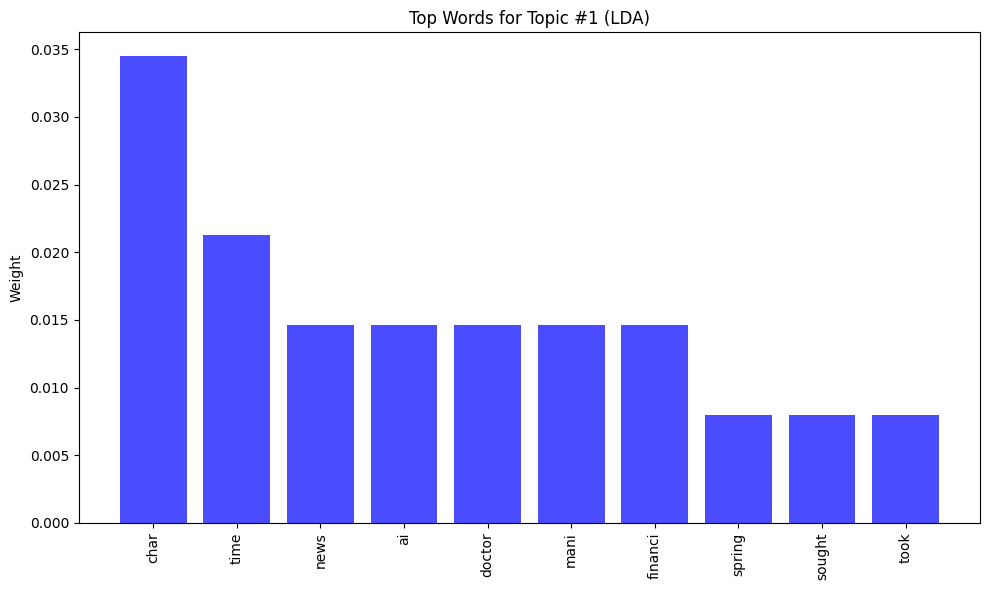

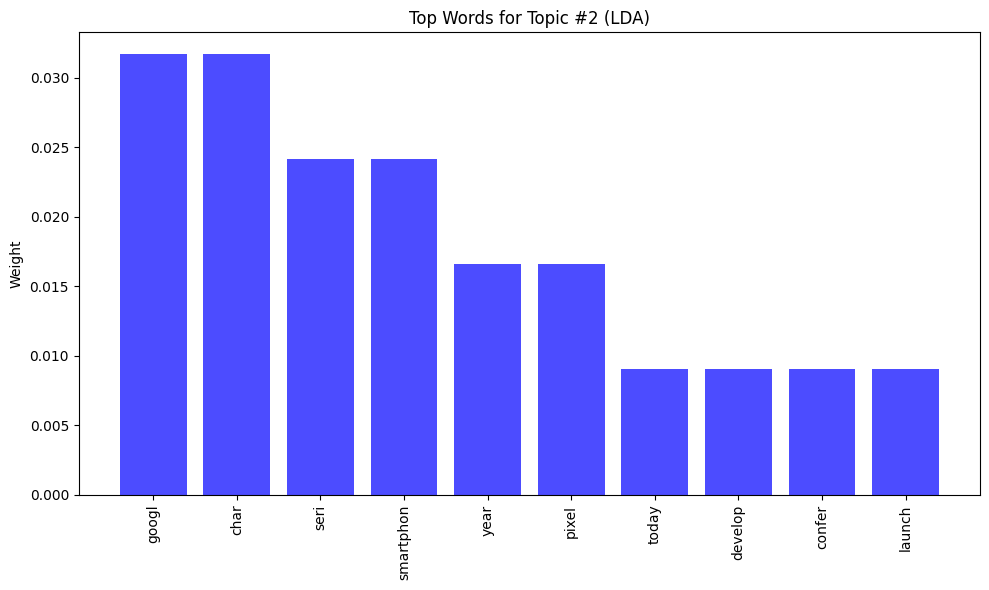

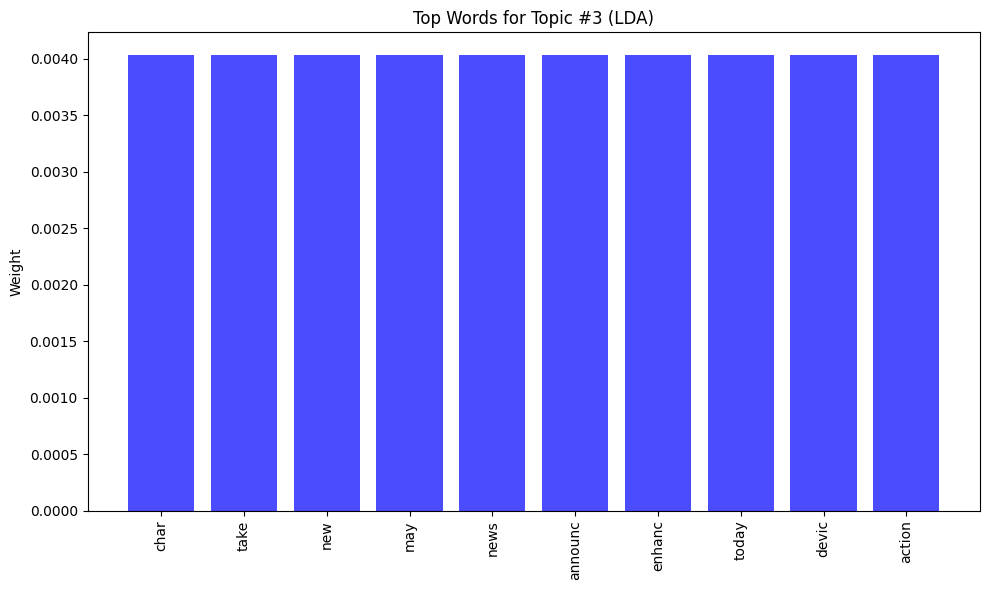

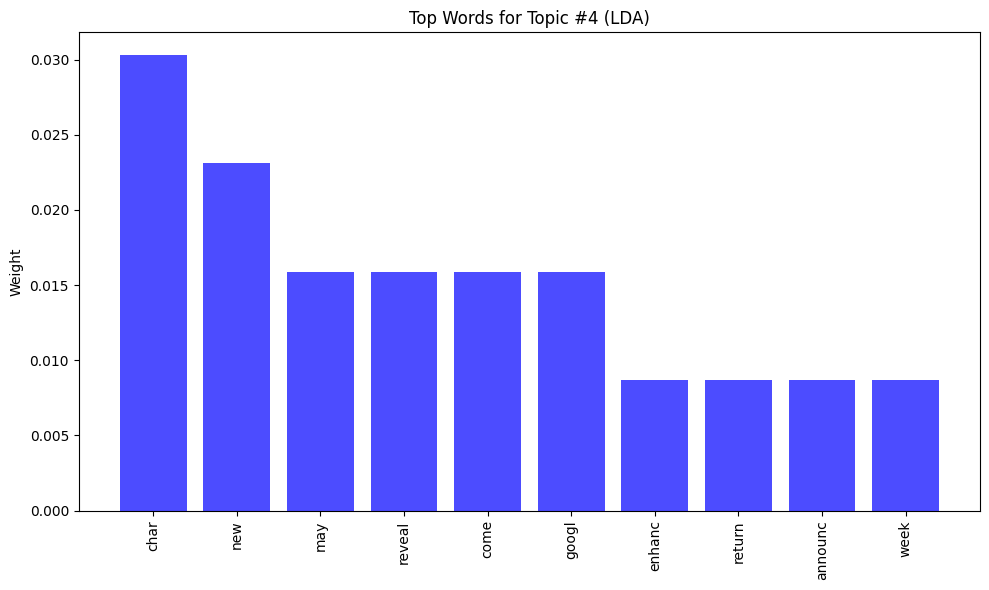

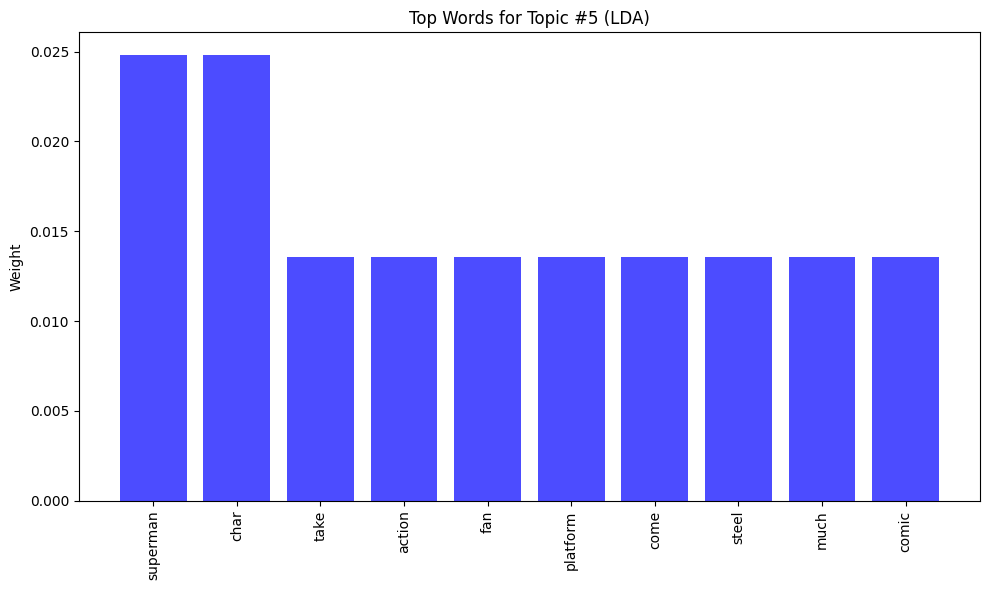

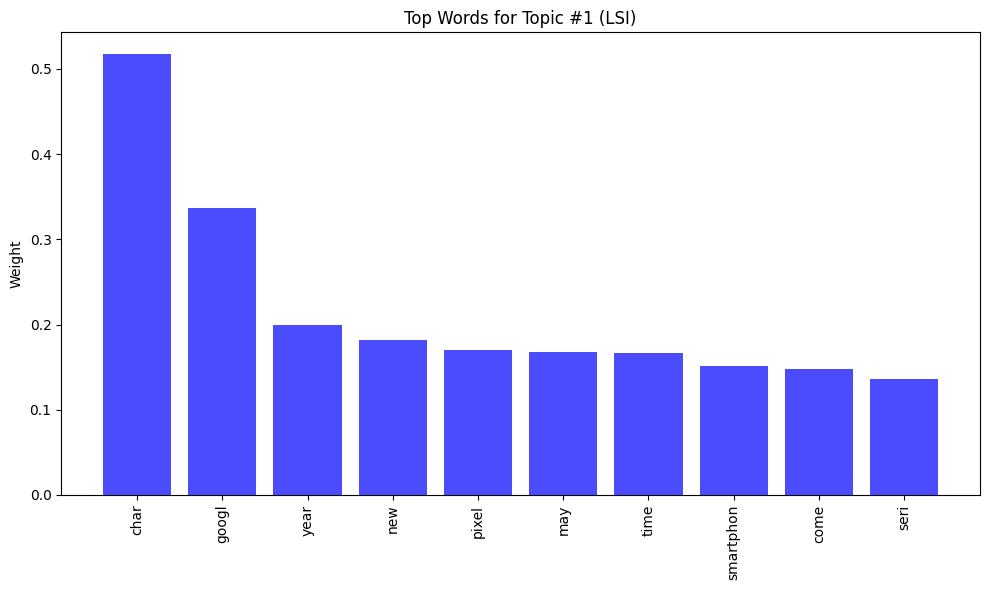

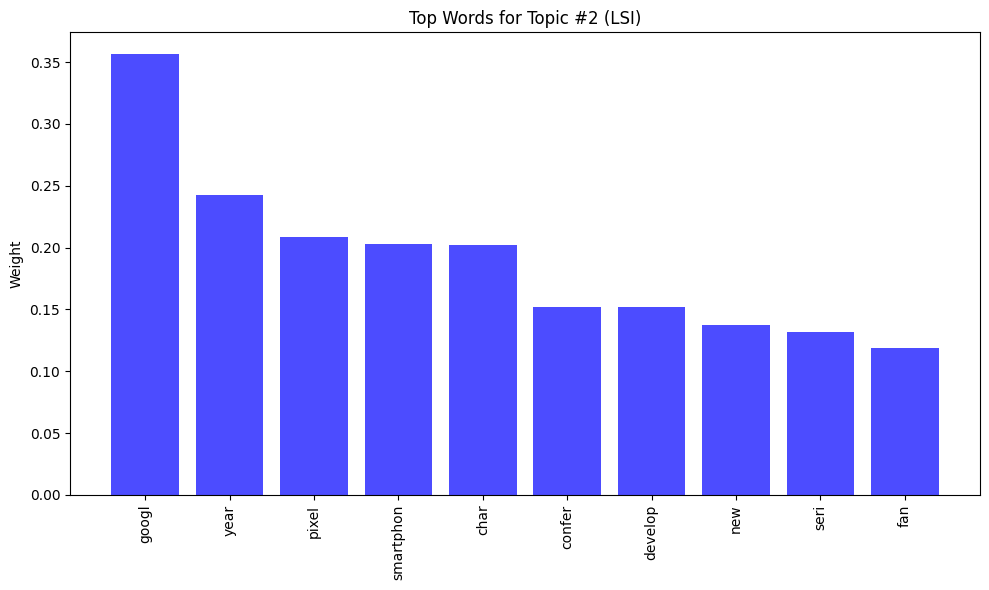

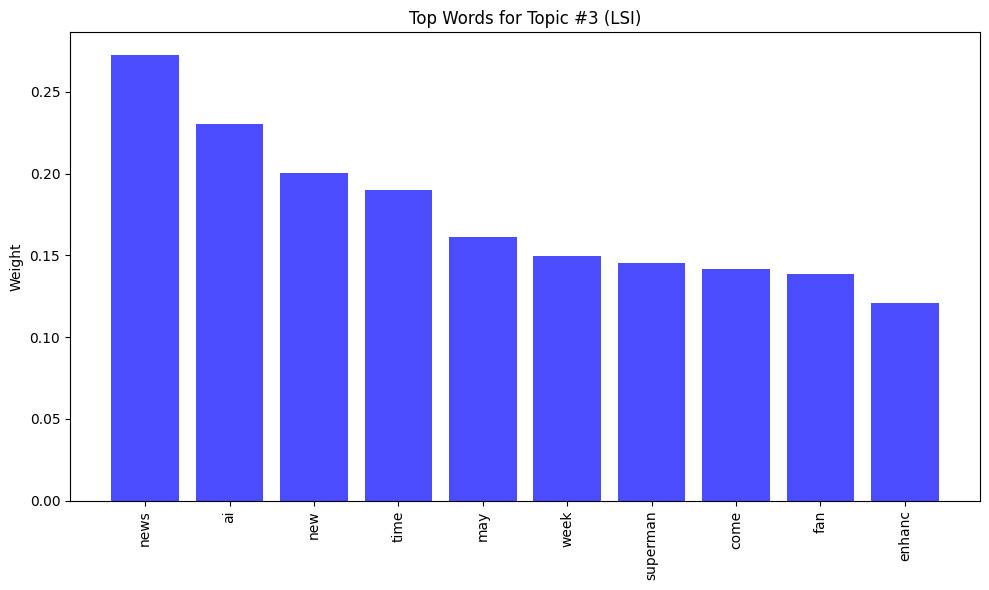

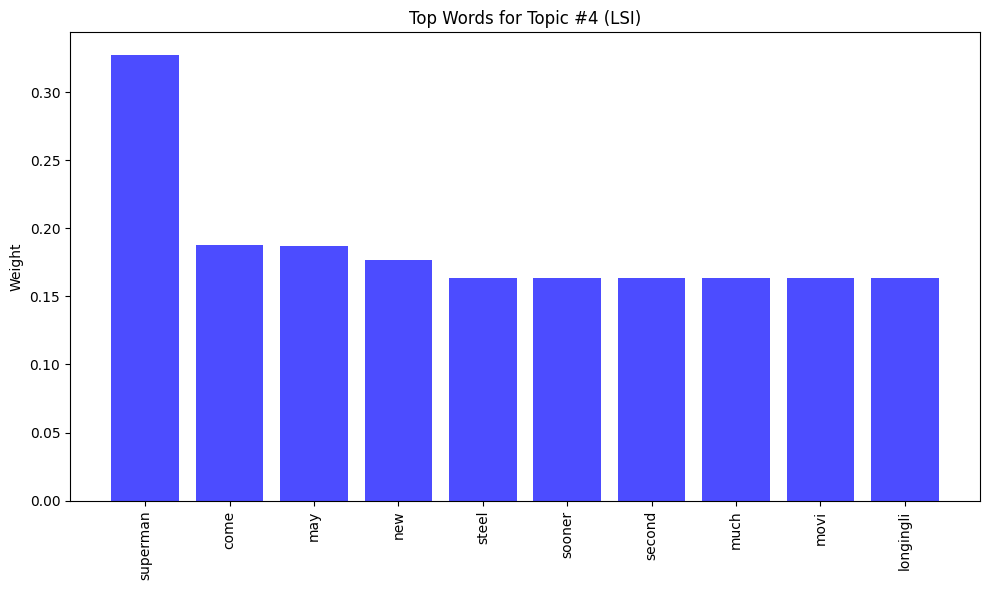

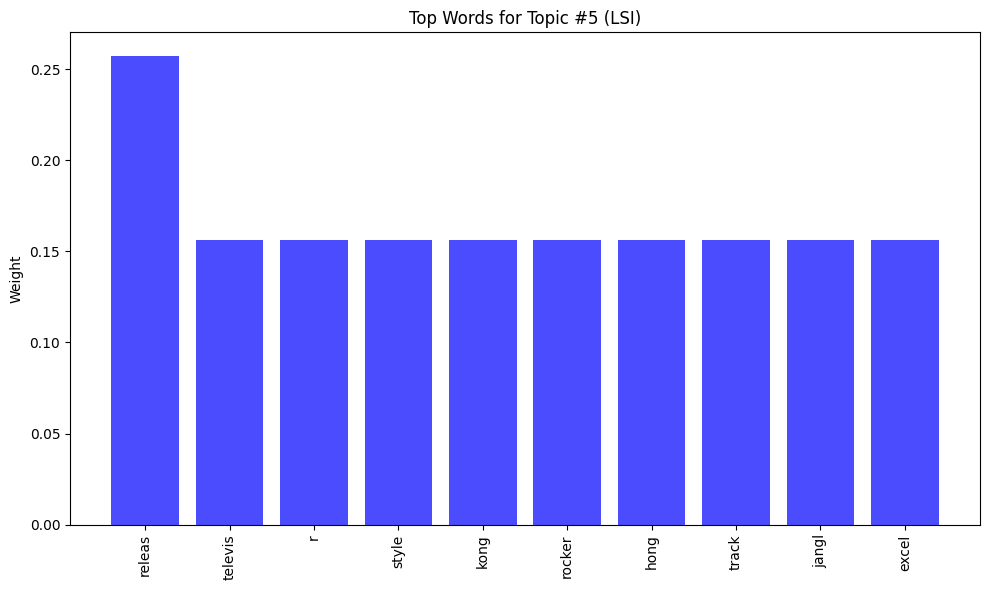

In [ ]:
import matplotlib.pyplot as plt

def plot_top_words(model, model_type="LDA", num_topics=5):
    for i in range(num_topics):
        plt.figure(figsize=(10, 6))
        if model_type == "LDA":
            topic_words = model.show_topic(i, 10)
        elif model_type == "LSI":
            topic_words = model.show_topic(i, 10)
        else:
            raise ValueError("Unsupported model type. Use 'LDA' or 'LSI'.")

        # Extracting words and their corresponding weights
        words, weights = zip(*[(word, abs(weight)) for word, weight in topic_words])

        # Adjust weights for visual clarity if needed (optional)
        weights = [abs(weight) for weight in weights]  # Use absolute for LSI if negative weights are confusing

        # Creating the bar plot
        plt.bar(words, weights, color='blue', alpha=0.7)
        plt.xticks(rotation=90)
        plt.title(f'Top Words for Topic #{i+1} ({model_type})')
        plt.ylabel('Weight')
        plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
        plt.show()

# Example usage
plot_top_words(ldamodel, "LDA")
plot_top_words(lsimodel, "LSI")


In [ ]:
import matplotlib.pyplot as plt


Total Word Count: 526


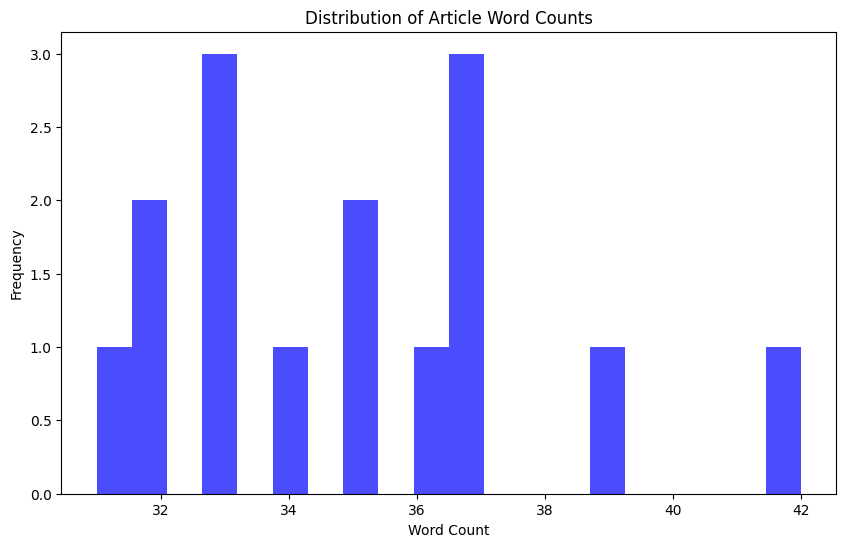

In [ ]:
# Word counts per article
data['word_count'] = data['content'].apply(lambda x: len(x.split()))
print("Total Word Count:", data['word_count'].sum())

# Visualize word count distribution
plt.figure(figsize=(10, 6))
plt.hist(data['word_count'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Article Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


In [ ]:
from gensim import corpora, models

dictionary = corpora.Dictionary(doc_clean)
corpus = [dictionary.doc2bow(doc) for doc in doc_clean]

# LDA Model
ldamodel = models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=50)
print(ldamodel.show_topics())

# LSI Model
lsimodel = models.LsiModel(corpus, num_topics=5, id2word=dictionary)
print(lsimodel.show_topics())


[(0, '0.035*"char" + 0.021*"time" + 0.015*"news" + 0.015*"ai" + 0.015*"doctor" + 0.015*"mani" + 0.015*"financi" + 0.008*"spring" + 0.008*"sought" + 0.008*"took"'), (1, '0.032*"googl" + 0.032*"char" + 0.024*"seri" + 0.024*"smartphon" + 0.017*"year" + 0.017*"pixel" + 0.009*"today" + 0.009*"develop" + 0.009*"confer" + 0.009*"launch"'), (2, '0.004*"char" + 0.004*"take" + 0.004*"new" + 0.004*"may" + 0.004*"news" + 0.004*"announc" + 0.004*"enhanc" + 0.004*"today" + 0.004*"devic" + 0.004*"action"'), (3, '0.030*"char" + 0.023*"new" + 0.016*"may" + 0.016*"reveal" + 0.016*"come" + 0.016*"googl" + 0.009*"enhanc" + 0.009*"return" + 0.009*"announc" + 0.009*"week"'), (4, '0.025*"superman" + 0.025*"char" + 0.014*"take" + 0.014*"action" + 0.014*"fan" + 0.014*"platform" + 0.014*"come" + 0.014*"steel" + 0.014*"much" + 0.014*"comic"')]
[(0, '0.517*"char" + 0.337*"googl" + 0.199*"year" + 0.182*"new" + 0.170*"pixel" + 0.168*"may" + 0.166*"time" + 0.152*"smartphon" + 0.147*"come" + 0.136*"seri"'), (1, '-0.3

In [ ]:
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 12.6 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


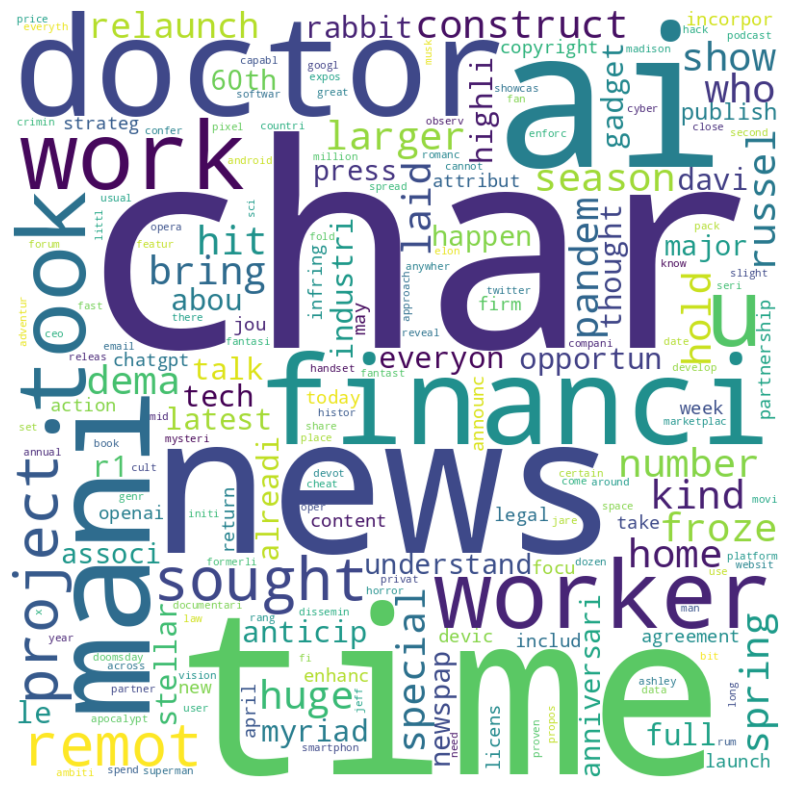

In [ ]:
from wordcloud import WordCloud

# Generate word cloud for first topic
plt.figure(figsize=(10, 10))
wc = WordCloud(background_color='white', width=800, height=800)
wc.generate_from_frequencies(dict(ldamodel.show_topic(0, 200)))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Interactive topic model visualization
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)
